# Extract Meta data from an image

Jpegs have metadata, so we can tell which images were taken with which camera.

In [1]:
import imageio.v3 as iio

CANOPY_IMAGE_DATA = iio.immeta(uri="../../data/raw/2019-06/P6200003.JPG")
assert "TG-4" in CANOPY_IMAGE_DATA["Model"]

print(CANOPY_IMAGE_DATA)

{'exif': b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x0f\x00\x0e\x01\x02\x00 \x00\x00\x00\xe4\x08\x00\x00\x0f\x01\x02\x00\x18\x00\x00\x00\x04\t\x00\x00\x10\x01\x02\x00\x11\x00\x00\x00\x1c\t\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xb0\x03\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xb8\x03\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00 \x00\x00\x00.\t\x00\x002\x01\x02\x00\x14\x00\x00\x00\x90\x08\x00\x00;\x01\x02\x00@\x00\x00\x00\xa4\x08\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x98\x82\x02\x00@\x00\x00\x00`\x0b\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xc2\x00\x00\x00%\x88\x04\x00\x01\x00\x00\x00\xa2\x02\x00\x00\xa5\xc4\x07\x00\x10\x02\x00\x00P\t\x00\x00T\x02\x00\x00!\x00\x9a\x82\x05\x00\x01\x00\x00\x00p\x0c\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00\x98\x0c\x00\x00"\x88\x03\x00\x01\x00\x00\x00\x05\x00\x00\x00\'\x88\x03\x00\x01\x00\x00\x00d\x00\x00\x000\x88\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x90\x07\x00\x04\x00\x00\

This is all well and good, but the `exif` data is stored as bytes not a `dict`
like the rest of the data.
Using `imageio` would require me to handle the bytes so I might be better off
using `PIL` or `Pillow`.

In [2]:
from PIL import Image
from PIL.ExifTags import GPSTAGS, TAGS

pil_image = Image.open("../../data/raw/2019-06/P6200003.JPG")
exif_data = pil_image._getexif()
exif = {TAGS.get(tag): value for tag, value in exif_data.items() if tag in TAGS}
gps_info = exif.get('GPSInfo')
gps_data = {GPSTAGS.get(tag): value for tag, value in gps_info.items() if tag in GPSTAGS}

lat = gps_data.get('GPSLatitude')
lat_direction = gps_data.get('GPSLatitudeRef')
lon = gps_data.get('GPSLongitude')
lon_direction = gps_data.get('GPSLongitudeRef')

print(f"latitude: {lat_direction} {lat} longitude: {lon_direction} {lon}")

latitude: N (51.0, 58.0, 21.0) longitude: E (0.0, 26.0, 24.0)


Well at least something comes out.

{'byteorder': '<',
 'is_agilent': False,
 'is_andor': False,
 'is_astrotiff': False,
 'is_bif': False,
 'is_dng': False,
 'is_eer': False,
 'is_epics': False,
 'is_fei': False,
 'is_fluoview': False,
 'is_frame': False,
 'is_gdal': False,
 'is_geotiff': False,
 'is_imagej': False,
 'is_indica': False,
 'is_lsm': False,
 'is_mdgel': False,
 'is_mediacy': False,
 'is_metaseries': False,
 'is_micromanager': False,
 'is_mmstack': False,
 'is_mrc': False,
 'is_multipage': False,
 'is_ndpi': False,
 'is_ndtiff': False,
 'is_nih': False,
 'is_ome': False,
 'is_philips': False,
 'is_pilatus': False,
 'is_qpi': False,
 'is_scanimage': False,
 'is_scn': False,
 'is_sem': False,
 'is_shaped': True,
 'is_sis': False,
 'is_stk': False,
 'is_streak': False,
 'is_subifd': False,
 'is_svs': False,
 'is_tiffep': False,
 'is_tvips': False,
 'is_uniform': True,
 'is_virtual': False,
 'is_vista': False,
 'is_volumetric': False,
 'shape': [5, 3]}


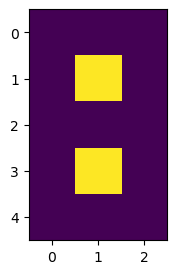

In [7]:
import pprint

from aqua_marina import file_finder_service
from matplotlib import pyplot

eight_path = file_finder_service.find_training_image('eight.tif')

eight = iio.imread(uri=eight_path)

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(eight)

meta_data = iio.immeta(uri=eight_path)
pprint.pprint(meta_data)